## Параллельное программирование дискретной передаточной функции

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

In [2]:
t = 10 # общее время моделирования
T = 0.1 # период дискретизации

time = np.arange(0,t,T) # массив значений времени

x = np.ones(len(time),dtype=int) # входной сигнал, в данном случае на вход подается константа  равная 1
y = np.zeros(len(time),dtype=float) # выходой сигнал, инициализированный нулями
y_1 = np.zeros(len(time),dtype=float) # 
y_2 = np.zeros(len(time),dtype=float) # 

Пример передаточной функции: 

$$W_{p}(z)=\frac{2z^2+z-3}{z^3+3z^2-7z+3} = \frac{1.19}{z+4.646} + \frac{-0.81}{z-0.646} = W_1(z) + W_2(z)$$ 

$$W_1(z) = \frac{1.19}{z+4.646} = \frac{1.19z^{-1}}{1+4.646z^{-1}}$$ 

$$W_2(z) = \frac{-0.81}{z-0.646} = \frac{-0.81z^{-1}}{1-0.646z^{-1}}$$ 

Разностные уравнения для параллельного программирования: 

$$y_1[i] = 1.19x[i-1] - 4.646y_1[i-1]$$ 

$$y_2[i] = -0.81x[i-1] + 0.646y_2[i-1]$$ 

$$y[i] = y_1[i] + y_2[i]$$ 


In [3]:
# задаем начальные значения для дальнейшего вычисления
y_1[0] = 0
y_2[0] = 0
y[0] = y_1[0] * y_2[0]

In [4]:
# вычисляем выходной сигнал
for i in range(1,len(time)):
    y_1[i] = 1.19*x[i-1] - 4.646*y_1[i-1]
    y_2[i] = -0.81*x[i-1] + 0.646*y_2[i-1]
    y[i] = y_1[i] + y_2[i]

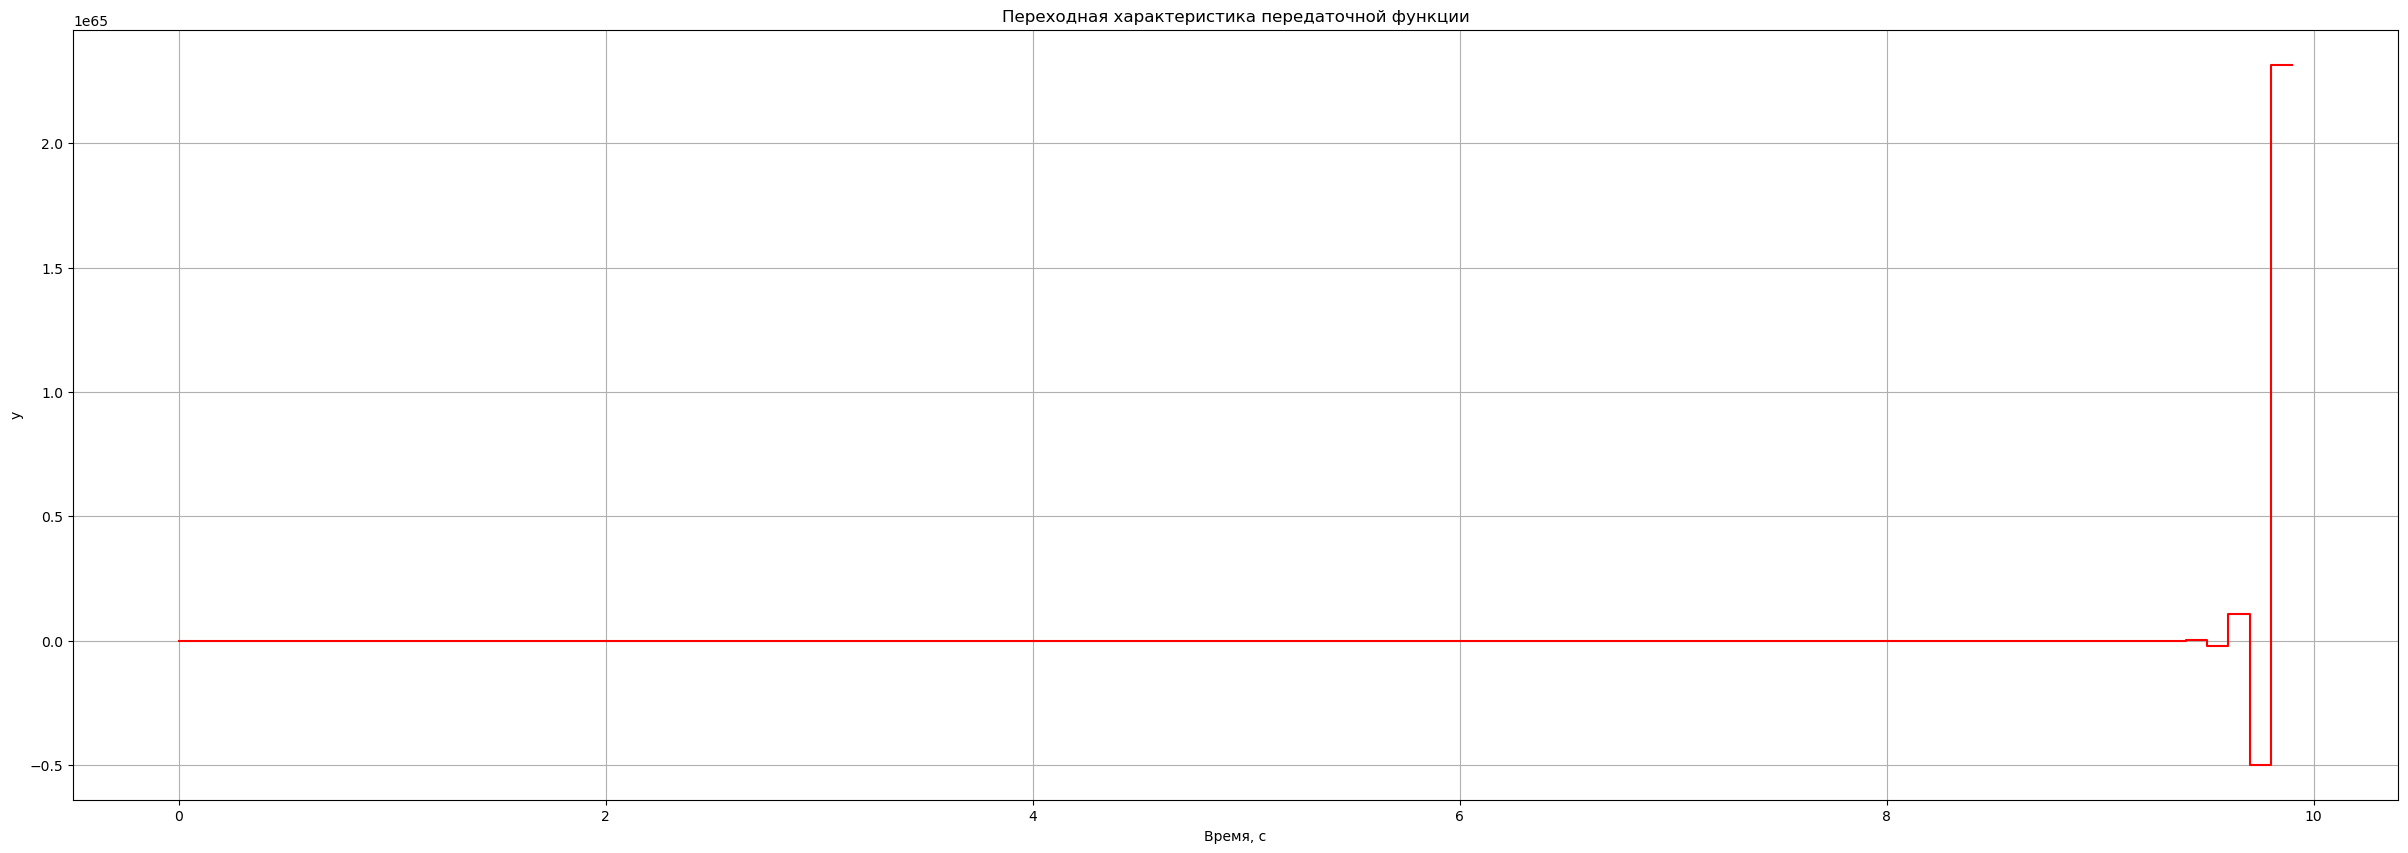

In [6]:
# рисуем график
plt.step(time,y,'r')
plt.title('Переходная характеристика передаточной функции')
plt.xlabel('Время, с')
plt.ylabel('y')
plt.rcParams["figure.figsize"] = (30,10)
plt.grid()
plt.show()